In [ ]:
import sklearn
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
x,y=fetch_openml('mnist_784',version=1,return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x=x.to_numpy()
y=y.to_numpy()

In [ ]:
x.shape

(70000, 784)

In [ ]:
x_train=x[:49000]
x_test=x[49000:]

In [ ]:
y_train=y[:49000]
y_test=y[49000:]

In [ ]:
idx_6=np.where(y_train=='6')
x_train_6=x_train[idx_6]
y_train_6=np.ones(len(x_train_6))

In [ ]:
idx_9=np.where(y_train=='9')
x_train_9=x_train[idx_9]
y_train_9=np.zeros(len(x_train_9))

In [ ]:
x_train_69=np.concatenate((x_train_6,x_train_9))
y_train_69=np.concatenate((y_train_6,y_train_9))

In [ ]:
from sklearn.utils import shuffle

In [ ]:
x_train_69,y_train_69=shuffle(x_train_69,y_train_69,random_state=1729)

In [ ]:
y_train_69.sum()

4855.0

In [ ]:
idx_test_6=np.where(y_test=='6')
x_test_6=x_test[idx_test_6]
y_test_6=np.ones(len(x_test_6))

In [ ]:
idx_test_9=np.where(y_test=='9')
x_test_9=x_test[idx_test_9]
y_test_9=np.zeros(len(x_test_9))

In [ ]:
x_test_69=np.concatenate((x_test_6,x_test_9))
y_test_69=np.concatenate((y_test_6,y_test_9))

In [ ]:
x_test_69,y_test_69=shuffle(x_test_69,y_test_69,random_state=1729)

In [ ]:
y_test_69.sum()

2021.0

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x_train_69tf=ss.fit_transform(x_train_69)

In [ ]:
x_train_69tf[0].mean()

0.08128379559427823

In [ ]:
df=pd.DataFrame(x_train_69tf)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,9746.0,9746.0,9746.0,9746.0,9746.0,9746.0,9746.0,9746.0,9746.0,9746.0,...,9.746000e+03,9.746000e+03,9.746000e+03,9.746000e+03,9.746000e+03,9746.0,9746.0,9746.0,9746.0,9746.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.458122e-17,-7.290609e-18,4.374365e-18,-2.916244e-18,-7.655139e-18,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.298387e-02,-2.197391e-02,-2.389124e-02,-1.709722e-02,-1.276348e-02,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.298387e-02,-2.197391e-02,-2.389124e-02,-1.709722e-02,-1.276348e-02,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.298387e-02,-2.197391e-02,-2.389124e-02,-1.709722e-02,-1.276348e-02,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.298387e-02,-2.197391e-02,-2.389124e-02,-1.709722e-02,-1.276348e-02,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.179901e+01,6.221609e+01,5.496834e+01,8.463602e+01,9.389167e+01,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
sgd_a=SGDClassifier(penalty=None,random_state=10,eta0=0.01,loss='log',max_iter=1,learning_rate='constant',warm_start=True)

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
loss_a=[]
iteration=10
for i in range(iteration):
  sgd_a.fit(x_train_69,y_train_69)
  y_pred=sgd_a.predict_proba(x_train_69)
  loss_a.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

In [ ]:
loss_a

[0.07026774208836734,
 0.036983022151772384,
 0.11464736867049394,
 0.07396604430354455,
 0.0628711376580129,
 0.014793208860709088,
 0.08136264873389898,
 0.10355246202496228,
 0.007396604430354655,
 0.003698302215177439]

In [ ]:
iter=[]
for i in range(iteration):
  iter.append(i+1)

In [ ]:
iter

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

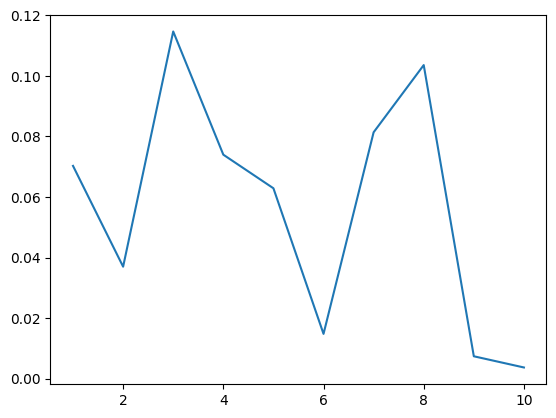

In [ ]:
plt.plot(iter,loss_a)

In [ ]:
sgd_b=SGDClassifier(penalty=None,random_state=10,eta0=0.000001,loss='log',max_iter=1,learning_rate='constant',warm_start=True)

In [ ]:
loss_b=[]
iteration=10
for i in range(iteration):
  sgd_b.fit(x_train_69,y_train_69)
  y_pred=sgd_b.predict_proba(x_train_69)
  loss_b.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

In [ ]:
loss_b

[0.007247702945144064,
 0.005086209073727681,
 0.003883883314929383,
 0.0030681564755779987,
 0.002529359907903669,
 0.002087831991269142,
 0.0016959910477317719,
 0.0014038336345746708,
 0.00120814629643334,
 0.0010669212070048423]

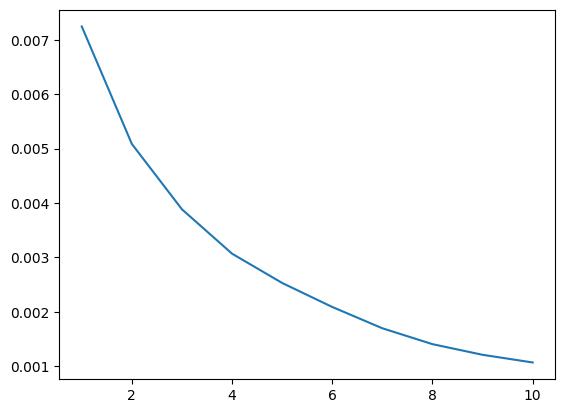

In [ ]:
plt.plot(iter,loss_b)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x_train_69_scaled=ss.fit_transform(x_train_69)

In [ ]:
loss_c=[]
iteration=10
for i in range(iteration):
  sgd_a.fit(x_train_69_scaled,y_train_69)
  y_pred=sgd_a.predict_proba(x_train_69_scaled)
  loss_c.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

Text(0, 0.5, 'Loss')

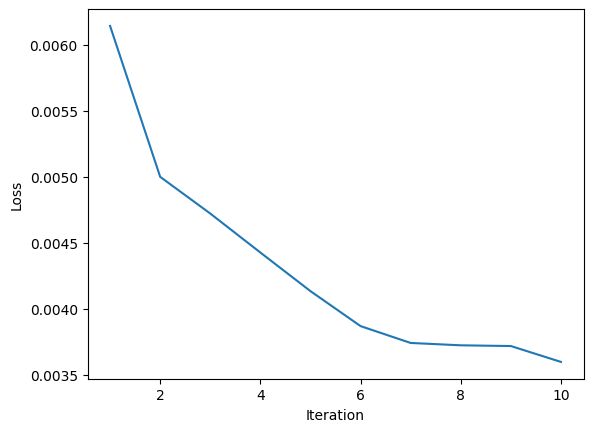

In [ ]:
plt.plot(iter,loss_c)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [103]:
sgd_d=SGDClassifier(penalty=None,random_state=10,eta0=1,power_t=1,loss='log',max_iter=1,learning_rate='invscaling',warm_start=True)

In [105]:
loss_d=[]
iteration=10
for i in range(iteration):
  sgd_d.fit(x_train_69,y_train_69)
  y_pred=sgd_d.predict_proba(x_train_69)
  loss_d.append(log_loss(y_train_69,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

Text(0, 0.5, 'Loss')

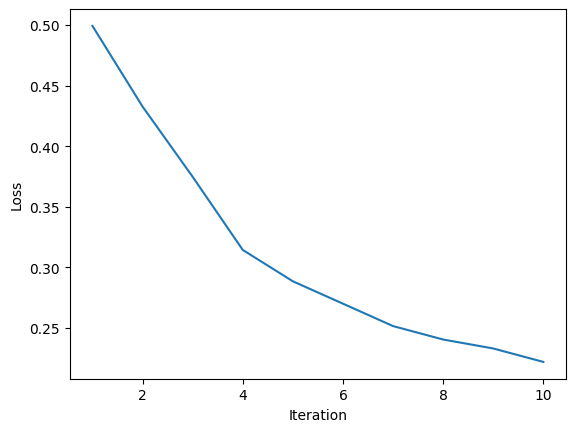

In [106]:
plt.plot(iter,loss_d)
plt.xlabel('Iteration')
plt.ylabel('Loss')